

Project - Option 2: Imagine you're working with Sprint, one of the biggest telecom companies in the USA. They're really keen on figuring out how many customers might decide to leave them in the coming months. Luckily, they've got a bunch of past data about when customers have left before, as well as info about who these customers are, what they've bought, and other things like that. So, if you were in charge of predicting customer churn, how would you go about using machine learning to make a good guess about which customers might leave? 
What steps would you take to create a machine learning model that can predict if someone's going to leave or not?



First I would understand what the telecom company does.
Then I can understand why churning happens and what the signs of it happening.
Then import or collect the telecom company data.
Then I would perform the data analysis, where featured engineering occurs and the data wrangling process is carried out. To remove the outliers and missing values are removed.
Then I would perform exploratory data analysis, to identify the characteristics, such as the customer's talk time and what is the average, what is the minimum and maximum amoutn of time a customer went without using their phone and it led to churning. 
Additionally, things like age may count and to check if there has been any changes which would affect a certain age group more.
The machine learning agent can then use look at the characteristics and see if they are part of the pattern and if anything new is contributing to churning. If anything changes reinforcement learning is done and the agent also includes any new factors leading to churning to its prediction.

CREATING MACHINE LEARNING MODEL

Creating a model will include different libraries such as: Numpy, Scipy, Scikit-learn, Theano, TensorFlow, Keras, PyTorch, Pandas, Matplotlib.
Then the model uses the data to train in looking for patterns as the churning being true or false is present.
Then the churning process becomes predictive as the characteristics to be checked have been identified and more added that a human eye cannot know.
After training the machine learning agent and finding it results accurate through putting it through a series of test.
The agent can be able to predict the next set of churning customers and the telecom company can be able to do something about it, such as offers, loyalty reward, and other gifts, before the customers churn saving telecom company time and money.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv('datasets/Telco-Customer-Churn.csv')

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
dataset.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

Below is the number of customers from the Telco that have churned

In [8]:
(dataset.Churn=='Yes').sum()

1869

Below is the number of customers from the Telco that have not churned

In [9]:
(dataset.Churn=='No').sum()

5174

In [10]:
dataset= pd.get_dummies(data=dataset,drop_first=True)

In [11]:
dataset

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
(dataset.Churn_Yes==1).sum()

1869

In [13]:
(dataset.Churn_Yes==0).sum()

5174

<AxesSubplot:ylabel='Frequency'>

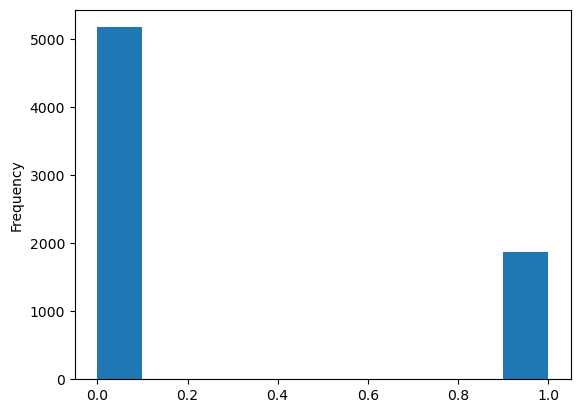

In [14]:
dataset.Churn_Yes.plot.hist()

In [15]:
dataset_2=dataset.drop(columns='Churn_Yes')

In [16]:
dataset_2

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
2+2

4

In [19]:
X= dataset.drop(columns='Churn_Yes')
y= dataset['Churn_Yes']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_test.shape

(1409, 13601)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [23]:
X_train

array([[-0.4397627 ,  1.61253221,  0.67415397, ..., -0.01332386,
         0.        , -0.01332386],
       [ 2.27395367, -0.7479074 , -0.61489382, ..., -0.01332386,
         0.        , -0.01332386],
       [-0.4397627 ,  1.57183498, -1.3350973 , ..., -0.01332386,
         0.        , -0.01332386],
       ...,
       [-0.4397627 ,  1.04277093, -1.46649701, ..., -0.01332386,
         0.        , -0.01332386],
       [ 2.27395367, -1.27697145,  0.16352472, ..., -0.01332386,
         0.        , -0.01332386],
       [-0.4397627 , -1.15487975, -1.47814002, ..., -0.01332386,
         0.        , -0.01332386]])

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [25]:
y_pred= clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [27]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [28]:
results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.762952,0.254464,0.7125,0.154891


In [29]:
print(confusion_matrix(y_test,y_pred))

[[1018   23]
 [ 311   57]]


In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
RF_results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results.append(RF_results,ignore_index=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7604\1302830337.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append(RF_results,ignore_index=True)


,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.762952,0.254464,0.712500,0.154891
1,Random Forest Classifier,0.784244,0.484746,0.644144,0.388587


In [ ]:
dataset.head()